# Clustering

This file contains the different cluster methods.

# Table of Contents

1. [Introduction & Motivation](#intro) (Sebastian/Skyler)
2. [What even is Clustering anyway?](#cluster) (Yannik/Skyler)
3. [Performance Metric - Silhouette Score](#perfom) (Debasmita)
4. [Surrogate Data & Yannik's Class](#class)
5. [Clustering Algorithms](#algos)<br>
    1. [Partion](#partition)<br>
         1. [K-Means](#kmeans) (Skyler) <br>
         2. [Spectral Clustering](#spectral) (Sebastian) <br>
    2. [Hierarchical](#hier)
        1. [Agglomerative Clustering](#agglo) (Sebastian/Skyler)
        2. [BIRCH Clustering](#birch) (Sebastian)
    3. [Density-Based](#density) (Debasmita)
        1. [DBSCAN](#dbscan) 
        2. [HDBSCAN](#hdbscan)
    4. [Expectation Maximization](#em) (Yannik)
    5. [Affinity Propagation](#ap) (Debasmita)

# 1. Introduction & Motivation <a name="intro"/>

All of our group members shared the same motivation for this project: We wanted to learn about different clustering algorithms with a focus on their theoretical foundations and underlying concepts. In so doing, we wanted to produce a notebook with detailed explanations regarding different clustering algorithms, which should serve as a useful future reference when implementing a clustering algorithm. We specifically did not want to solve a particular optimization task, i.e. applying a specific algorithm to a real-world dataset and optimizing for a specific performance metric. 

So, what can you, the reader, expect from this document? Essentially, we analyzed and described a number of well-known categories of clustering algorithms and implemented them in Python:  
- K-Means and Spectral Clustering (both Partition); 
- Agglomerative Clustering and BIRCH Clustering (both Hierarchical); 
- DBSCAN and HDBSCAN (Density-based); 
- Expectation Maximization;
- Affinity Propagation. 

Ultimately our purpose here is to endow the reader with a functional understanding of how some key clustering algorithms work, rather than providing a comprehensive deep-dive into any one topic/algorithm.

# 2. What even is Clustering anyway?  <a name="cluster"/>

Perhaps the most salient characteristic that one needs to understand about clustering algorithms is that they are employed in an **Unsupervised Learning** context. What that means the data these algorithms deal with is unlabelled; it is left up to the algorithm to find any patterns/similarities therein. Broadly, clustering algorithms assess the similarities between the different observations in a given dataset, with those observations manifesting a high degree of similarity being grouped together as a cluster. 

For those already possessing some degree of familiarity with Machine Learning, this idea of "finding similar observations and assigning said observations to a kind of group" might sound quite similar to **Classification**. So how then is Clustering different from Classification? The key differentiator between the two is that as discussed Clustering is used for Unsupervised Learning (unlabelled data) whereas Classification is used for Supervised Learning (labelled data). As a result, the categories (classes) to which observations are assigned by classification algorithms are fixed, while with clustering algorithms the clusters themself change iteratively during the course of running the algorithm. 

# 3. Performance Metric - Silhouette Score <a name="perfom"/>

- Tbd - Debasmita

# 4. Surrogate Data & Yannik's Class <a name="class"/>

The package `sklearn` has a module, which is called `datasets`. Within this package there are ~30 functions, which load sample data. All of those functions start with `load_...`. Moreover, this package has ~20 sample generators. These sample generators create surrogate data, which is different seperated based on the function. They all start with `make_...`. For a more exhaustive description of these functions please review the `sklearn` documentation found in bibliography [2].

The first step is to import that module from sklearn. We will also import matplotlib to plot what we have just created.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## `make_blobs`

The first function we can use to create surrogate data is the function called `make_blobs`. This creates Gaussian blobs for clustering. With the parameter `n_samples` one can influence the total number of points generated, with the `centers` parameter one can set the number of centers, viz. different classes for a classification problem, and with the `cluster_std` one can set the standard deviation around each center (i.e. as higher the `cluster_std` as higher the "noise" around the centers).

The function returns two values. Once the `X` variable, which contains the different datapoints, and once the `y` which contains the different labels for the datapoints. Over that we can check later how good/bad the cluster algorithm performed.

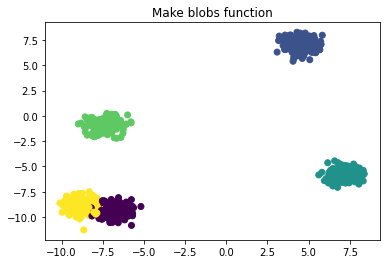

In [2]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 5, cluster_std = 0.5)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make blobs function")
plt.show()

## `make_circles`

The second function is called `make_circles`, which returns a circle within yet another circle, as one can see below. This function as well has different classes, as can be seen by the different colors. For this exercise we will use the parameters `n_samples`, which works like with the `make_blobs` function, and the `noise` parameter, which works like the `cluster_std` from `make_blobs`.  

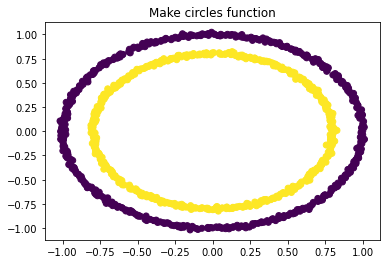

In [3]:
X, y = datasets.make_circles(n_samples = 1000, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make circles function")
plt.show()

## `make_classification`

Next, we will briefly introduce the `make_classification` function from `sklearn`s `datasets`. This function creates a random n-classification problem in a normal distribution. Hence, we can use the parameter `n_classes` to change the number of classes. I will set it to `5`, but that can be altered. With the parameter `n_informative` (which has to be >= `n_classes`) defines the number of informative features in the generated dataset.

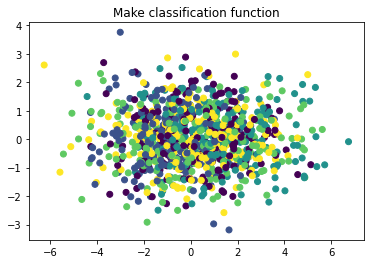

In [4]:
X, y = datasets.make_classification(n_samples=1000, n_classes = 5, n_informative = 10)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make classification function")
plt.show()

## `make_hastie_10_2`

Another function we want to test our algorithm on is the `make_hastie_10_2` function. This reproduces the example 10.2 from Haste et al. 2009 [2]. It defines the clusters by the following algorithm:
```python
y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1
```
The only parameter which can be altered here are the `n_samples`, viz. the number of samples. 

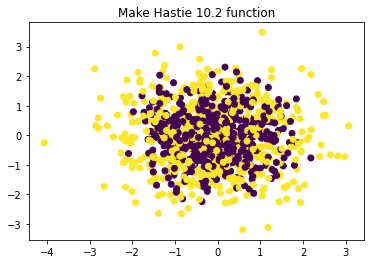

In [5]:
X, y = datasets.make_hastie_10_2(n_samples=1000)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make Hastie 10.2 function")
plt.show()

## `make_moons`

This function creates two interleaving half circles. It takes the arguments `n_samples` and `noise`, just like the function `make_circles`.

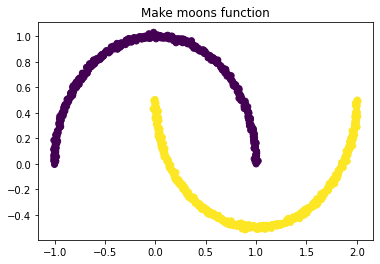

In [6]:
X, y = datasets.make_moons(n_samples = 1000, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make moons function")
plt.show()

In order to create a more easy way to compare all of the different clusters we decided to write a function which does it all for us, viz. creating the surrogate data in one place and also plot the given cluster algorithm to the surrogate data. The class we wrote is called `Surrogate_data`. It has several private functions, which are all leveraged in the `plot_raw_vs_predict` function. That function returns the surrogate data in comparision to the fitted data. Using a generic function for creating the same surrogate data time and again has the benefit that one can easily compare the different clustering algorithms. 

In the next line we will import that self written class.

In [7]:
from Surrogate_data import Surrogate_data
evaluate = Surrogate_data()

# 5. Clustering Algorithms <a name="algos"/>

Within this chapter we will offer deeper insights into different clustering algorithms. They are again seperated into different sub-chapters. It will start with clustering algorithms belonging to the class of Partition.

## A. Partition <a name="partition"/>

### a. K-Means <a name="kmeans"/>

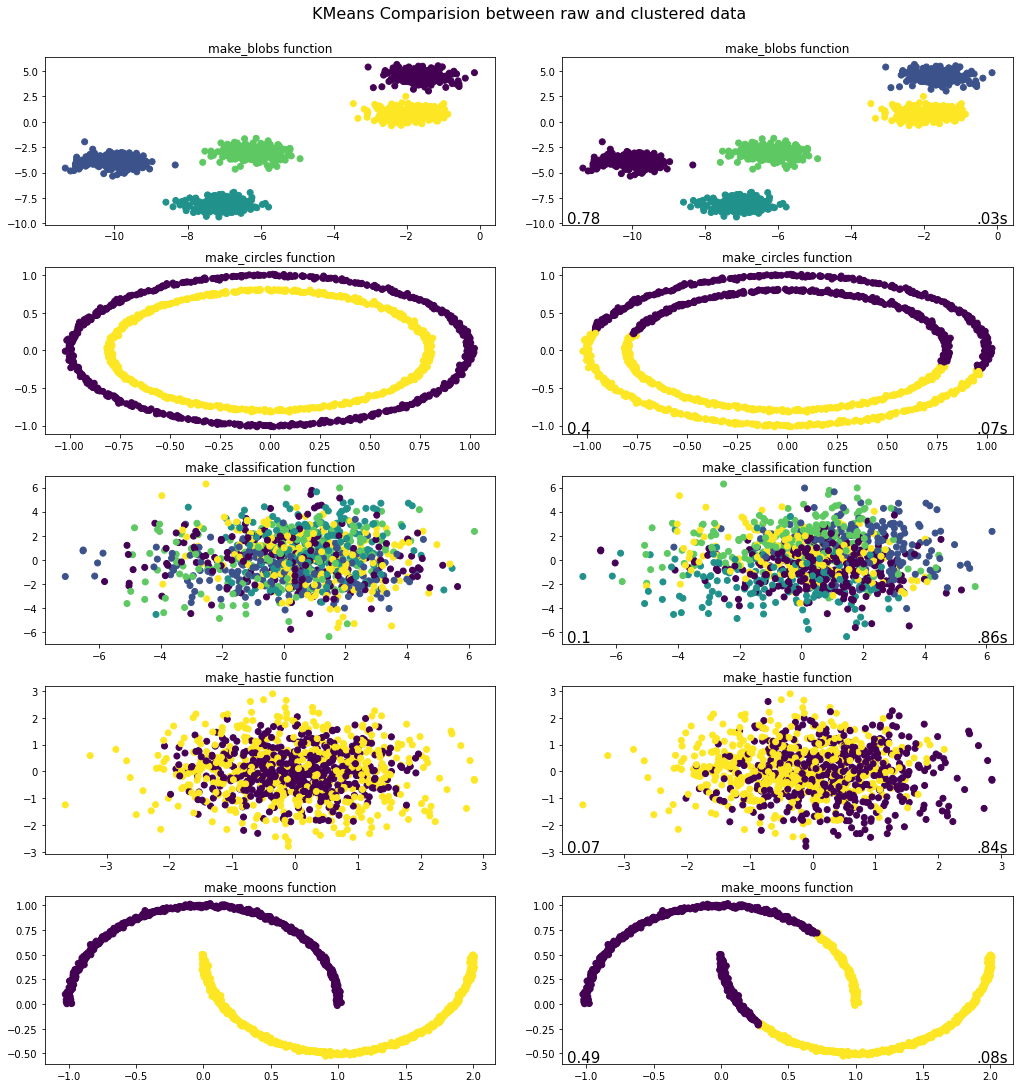

In [8]:
from sklearn.cluster import KMeans
evaluate.plot_raw_vs_predict(KMeans)

### b. Spectral Clustering <a name="spectral"/>

## B. Hierarchical <a name="hier"/>

### a. Agglomerative Clustering <a name="agglo"/>

### b. BIRCH Clustering <a name="birch"/>

## C. Density-Based <a name="density"/>

### a. DBSCAN <a name="dbscan"/>

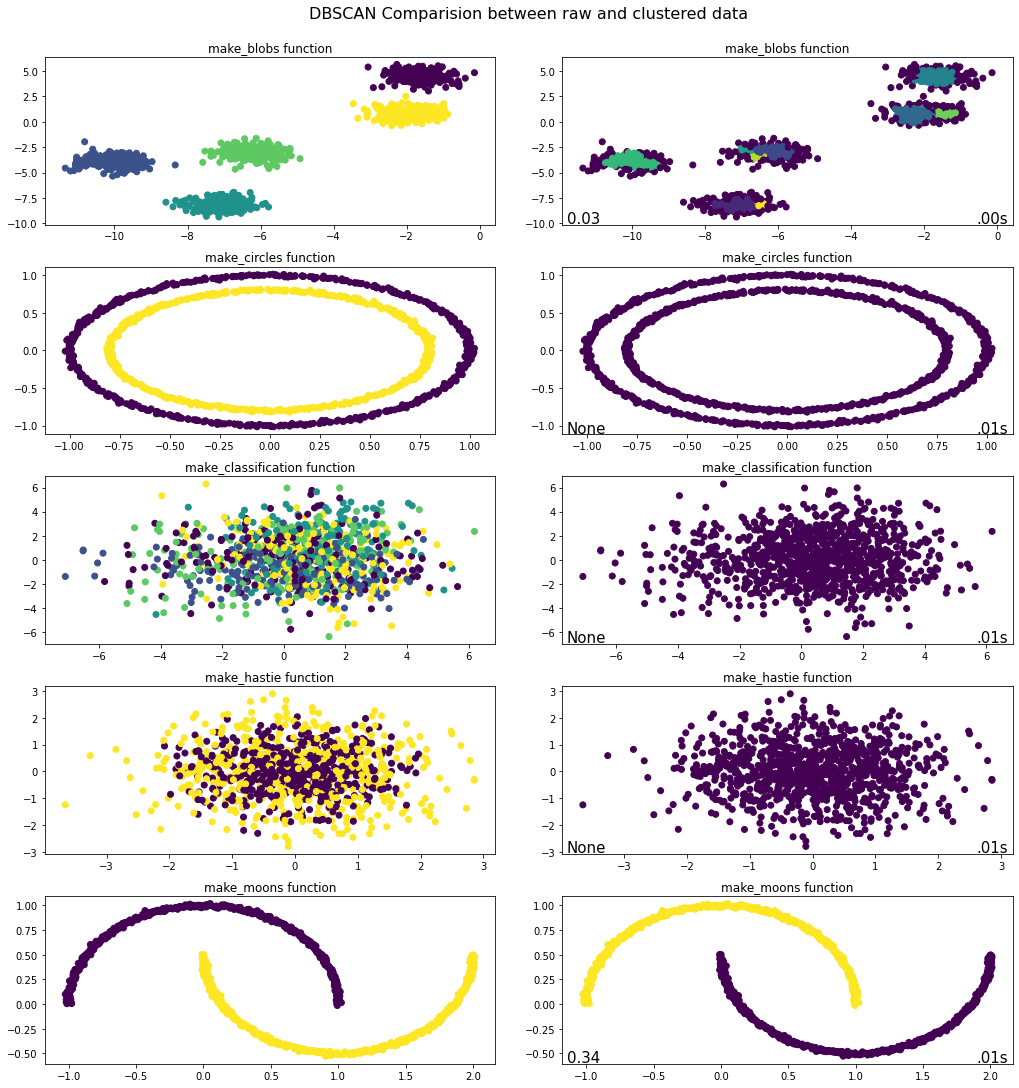

In [9]:
from sklearn.cluster import DBSCAN
evaluate.plot_raw_vs_predict(DBSCAN, eps = 0.2, min_samples = 10)

### b. HDBSCAN <a name="hdbscan"/>

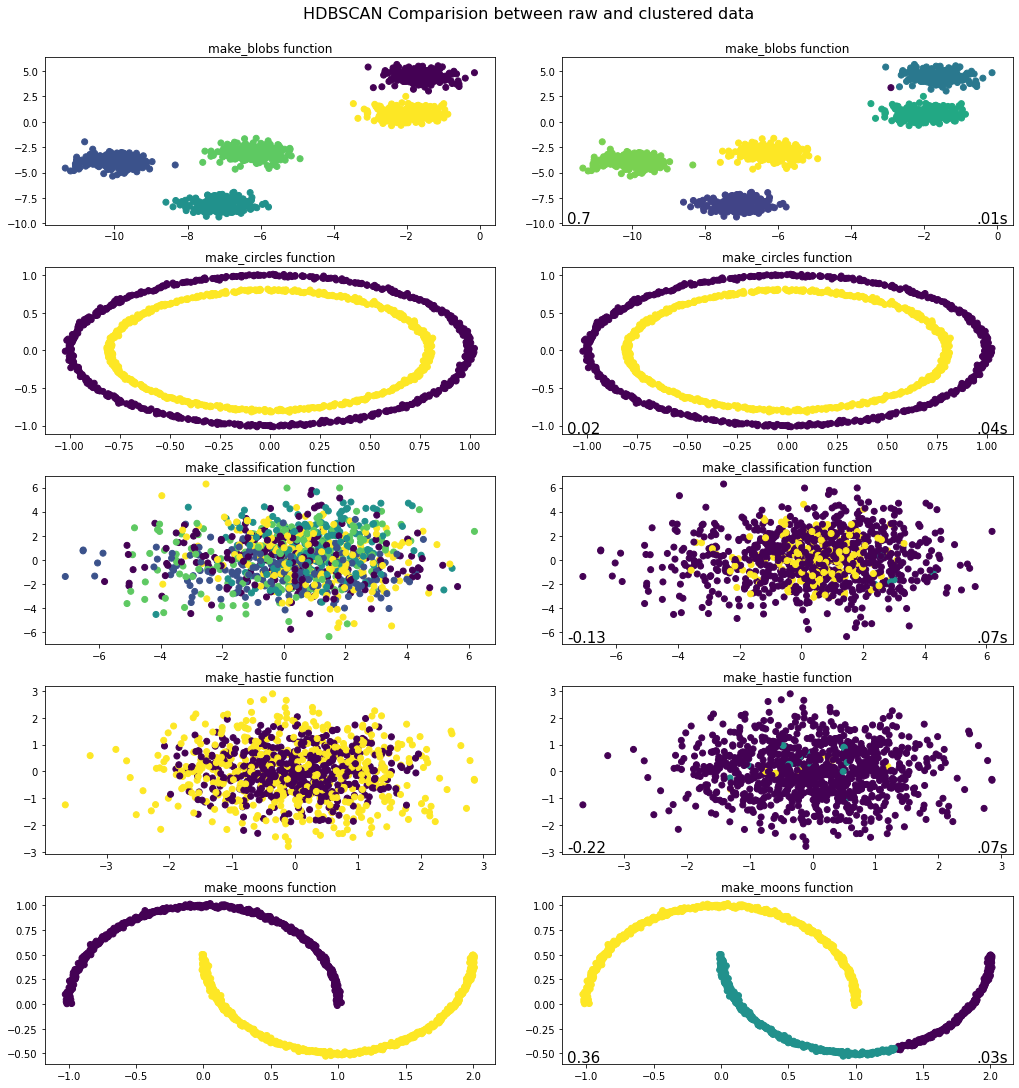

In [10]:
import hdbscan
evaluate.plot_raw_vs_predict(hdbscan.HDBSCAN)

## D. Expectation Maximization <a name="em"/>

The Expectation Maximization algorithm (EM) is an Maximum Likelihood Estimator (MLE) (for a closer examination of the relationship between MLE, MAP and EM see [1]). In the context of clustering it is also referred to as "soft cluster" algorithm, since it iteratively estimates the probabilites that a given set of data belongs to either cluster. Therefore it split up in two different "Steps", the E-Step and the M-Step, which we will delve in now.

### E-Step

The **E** in **E**-Step stands for "**E**xpectation", hence we want to calculate values which symbol the expectation that a given set of data belongs to either of the given $\theta$s (the $\theta$s hereby symbol our different clusters). In fact, $\theta$ displays the probability that a certain event happened in one cluster. For a coin toss, this would look like:

$$
\theta_A\ =\ 0.6\newline
\theta_B\ =\ 0.5
$$

which displays the probability that either coin A shows heads and the same respective for coin B. These initial values are randomly created in the range between $0$ and $1$. Like we already wrote when talking about [K-Means](#kmeans), this algorithm also needs beforehand a concrete input of how many clusters it should look for. After the $\theta$ values are initialized/given we turn to the sets of data. Lets imagine we have the following sets of data (where $H$ is for heads and $T$ is for tails):

$$
1.\ [HHTTHHTHTT]\newline
2.\ [HHHTHHHHHH]
$$

Since we know what the probability of heads is for the respective coins, we can now calculate the probability that either of those sets of data belong to either of those coins. For the first dataset with 5 heads and 5 tails, we can calculate the probability that it belongs to coin A like this:

$$
P(coin\ A|\ [HHTTHHTHTT]) = \frac{{0.6^5}*{0.4^5}}{{{0.6^5}*{0.4^5}}+{{0.5^5}*{0.5^5}}} = 0.45
$$

For the second set of data, the probability that it belongs to coin A would look like:

$$
P(coin\ A|\ [HHHTHHHHHH]) = \frac{{0.6^9}*{0.4^1}}{{{0.6^9}*{0.4^1}}+{{0.5^9}*{0.5^1}}} = 0.8
$$

Using this formula we can calculate the probabilities for all sets of data for all our $\theta$s. 

The "algorithm" uses this function to calculate all the expectations for coin a. The expectation for coin b are easily computed, since we can just do 1 - probability of coin a. Once we have all data, we can multiply our expectation with the number of events we want to measure. Meaning, we calculate:

$$
0.45∗5=2.2
$$

Now we know, that if the first data set would belong to coin a, we would expect 2.2 times heads and 2.2 times tails6. Once we have that full table, all what we do, is to do MLE. We sum up the values for the occurances of heads and tails for each coin, and calculate the probability of heads for each coin. This is also called the M(aximization)-step. These two probabilities we just calculated are now our new values, with which we re-run our expectation calculation. We can repeat this as many times as we want. The nice idea of this is, that in the end we can approximate the real θs, viz. after ten iterations we have a posterior maximization value of 0.8 for coin a.

We can make use of the `GaussianMixture` function from `sklearn` which implemented the EM algorithm.

In [11]:
from sklearn.mixture import GaussianMixture

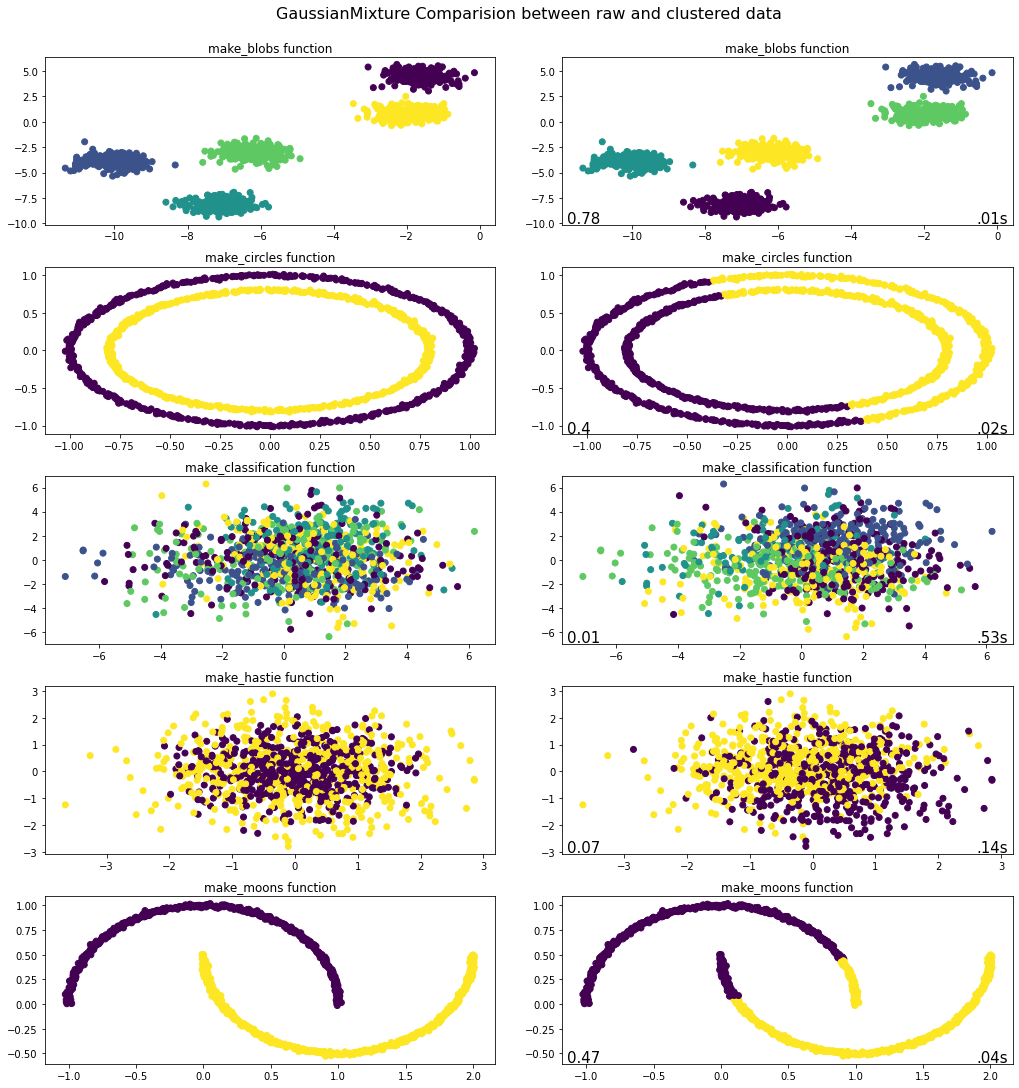

In [12]:
evaluate.plot_raw_vs_predict(GaussianMixture, init_params='kmeans', max_iter = 100)

## E. Affinity Propagation <a name="ap"/>

## Affinity Propagation ##
Affinity Propagation is an unsupervised clustering algorithm based on the concept of "message passing" between data points.  This algorithm particularly does not require the number of clusters as input.  
It applies the concept of "exemplars," members of the input set that are representative of clusters.
The main drawback is, this algorithm is computationally expensive.
    
![Message-Passing-in-Affinity-Propagation](Message-Passing-in-Affinity-Propagation.png)

### Steps of the algorithm ### 


1. The algorithm first calculates the Similarity Matrix for all the data points.  The similarity is calculated as negative squared euclidian distance.
$$s(i, k) = - \lvert\lvert x_i - x_k \rvert\rvert^2$$


2. The diagonal elements of the matrix is zero as per the above formula.  If the diagonal values are not modified that means all the elemnets will be an exemplars and many clusters will be formed.  There are two ways to control this situation.  The values can be modified either by the minimum value of the similarities between points or by the median value of the similarities.  In the former case least number of clusters will be formed whereas in the later case a moderate number of clusters will be formed.


3. As a next step it creates the "responsibility" matrix $R$ which has values $r(i, k)$ that quantify how well-suited $x_k$ is to serve as the exemplar for $x_i$, relative to other candidate exemplars for $x_i$.  The greater the value, the higher the chance that $x_k$ is an exemplar for $x_i$. The calculation is done by the below definition.

    $$r(i, k) \leftarrow s(i, k) - \max\limits_{k' s.t. k' \neq k}\{ a(i, k') + s(i, k') \}$$

    As the formula states, the responsibility of $k$ towards $i$ will decrease as the availability of some other $k'$ to $i$ increases.


4. The damping factor is used in the calculation as below.  This is in order to avoid numerical oscillations when updating         these values

    $$R = R * damping + (1 - damping) * R_{new}$$


5. The "availability" matrix $A$ contains values $a(i, k)$ that represent how "appropriate" it would be for $x_i$ to pick $x_k$ as its exemplar, taking into account other points' preference for $x_k$ as an exemplar. 

    For the diagonal elements (self availabilities) the calculation is done by the below definition.

    $$a(k, k) \leftarrow \sum\limits_{i' \neq k}\max(0, r(i', k))$$

    $a(k, k)$ reflects accumulated evidence that point $k$ is suitable to be an exemplar, based on the positive 
    responsibilities of $k$ towards other elements.


6. For the off diagonal elements the calculation is done by the below definition.

    $$a(i, k) \leftarrow \min\{0, r(k,k) + \sum\limits_{i' s.t. i' \notin \{i, k\}}{\max\{0, r(i', k)\}}$$

    The formula states that, availability is self-responsibility of $k$ plus the positive responsibilities of $k$ towards
    elements other than $i$. The intuition to include only positive responsibilities is: an exemplar should be positively 
    responsible to some data points, regardless of the negative responsibilites to other data points.
    If self-responsibility is negative, it means that $k$ is more suitable to belong to another exemplar, rather than being an 
    exemplar.
    
    The damping factor is used in the similar way as mentioned above.


7. The values are updated through iterations.  Iterations are performed until either the cluster boundaries remain unchanged over a number of iterations, or some predetermined number (of iterations) is reached. 


8. Criterion matrix is calculated after the updating is terminated. Criterion matrix $C$ is the sum of $R$ and $A$. The formula is

    $$c(i,k) \leftarrow r(i,k) + a(i,k)$$
    
    An element $i$ will be assigned to an exemplar $k$ which is not only highly responsible but also highly available to $i$.
    

9. The exemplars are extracted from the final matrices as those whose 'responsibility + availability' for themselves is positive (i.e. $(r(i,i)+a(i,i))>0$)


10. For point $i$, the $k$ with maximum $r(i, k) + a(i, k)$ represents point $i’s$ exemplar or cluster.

### Key parameters as per scikit learn ###

**damping** - Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

**max_iter** - Maximum number of iterations. Default is 200.

**preference** - Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, i.e. of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

This preference value indicates how strongly a data point thinks itself should be an exemplar. It is the diagonal value of the similarity matrix, $S$. If we choose to leave this value unmodified, we will see almost no clustering as most data points choose to be an exemplar for themselves. If we haven’t got a priori knowledge of the data points it is advised to start with a preference equal to the median of the input similarities.
Intuitively, if we want Affinity Propagation to be less eager in splitting clusters we can set the preference value lower.


### Output from the algorithm ###
**labels** - Cluster labels are returned.

# Bibliography

[1] https://stats.stackexchange.com/questions/235070/relation-between-map-em-and-mle/524802#524802

*Note: An exhaustive blogpost which explains MLE, MAP and EM and their relationship.*

[2] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

*Note: This is the exhaustive documentation of all available datasets and samples generator webpage. It offers deeper insights into which parameters else each function has.*

[3] T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.

*Note: This reference was directly taken from `sklearn`s documentation!* 

## Bibliography Affinity Propagation

- https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8

- https://en.wikipedia.org/wiki/Affinity_propagation#:~:text=In%20statistics%20and%20data%20mining,message%20passing%22%20between%20data%20points.

- https://www.researchgate.net/figure/Message-Passing-in-Affinity-Propagation-4_fig1_321462147